## Data
The animal audiograms database contains [10 audiograms](https://animalaudiograms.museumfuernaturkunde.berlin/audiogram?ids=31,32,63,61,60,58,65,64,62,57) of orcas in water.

All the audiograms for orcas were downloaded and stored in the file `data/Orcinus_orca.csv`

In [2]:
# import the FFT scripts from local file FFT.R
source("FFT.R")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
# Read the downloaded data
data_file <- "./data/Orcinus_orca.csv"
audiogram <- read.table(data_file, header=TRUE, sep=",")

## Computing the effective hearing range
The data can now be loaded to estimate the functional hearing range, i.e. the lowest and highest frequency that caused a measurable response in any audiogram of this species.

[1] "lowest frequency in effective hearing range: 0.1 kHz"
[1] "highest frequency in effective hearing range: 160 kHz"


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



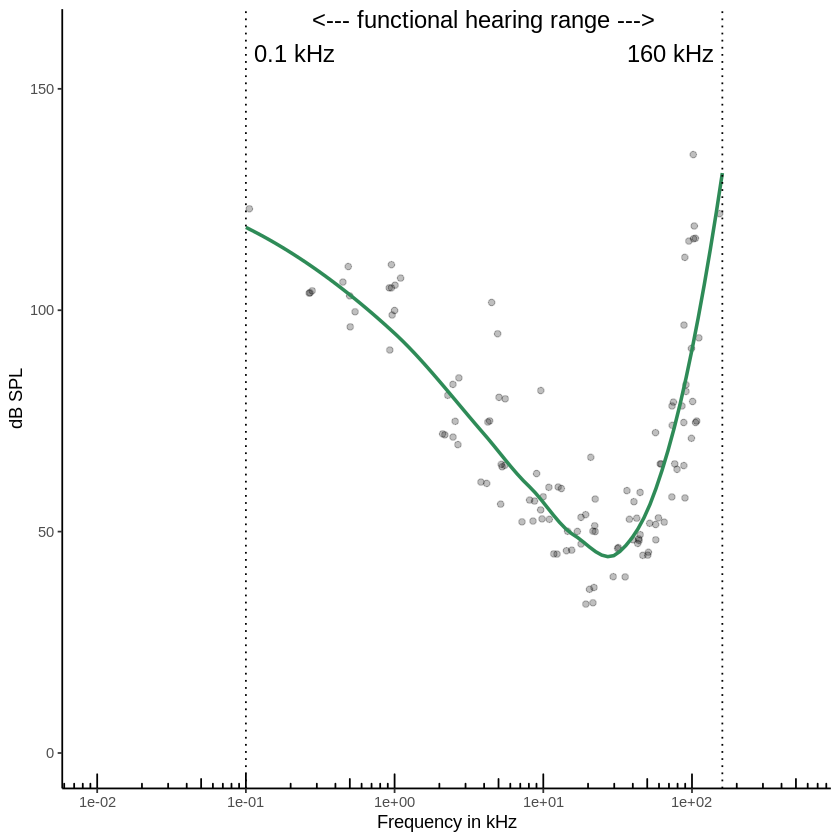

In [4]:
# compute the functional hearing frequency range
range <- def.f.range(audiogram)

print(paste("lowest frequency in effective hearing range:",range$eff.freq.low, "kHz"))
print(paste("highest frequency in effective hearing range:", round(range$eff.freq.high), "kHz"))

# plot the data, the fit curve, and the effective hearing range
plot.effective(audiogram, range)

## Defining the filter values
Filter weights are computed by applying the M-weighting function described in Southall et al. (2007), appendix A, p. 500

Frequency.in.kHz,Gain.in.dB
<dbl>,<dbl>
0.02000000,-65.13456852
0.04397048,-36.37383061
0.09667017,-14.52436038
0.21253171,-3.97241800
0.46725612,-0.86850035
1.02727387,-0.16209062
2.25848647,-0.01579347
4.96533715,0.00000000
10.91641386,-0.06719973


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



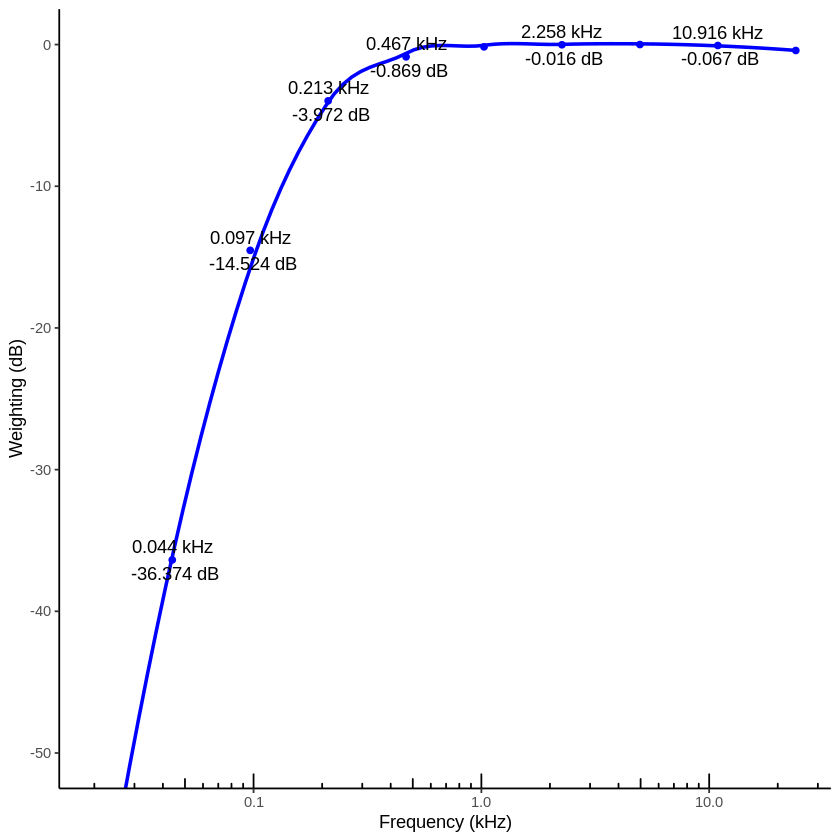

In [5]:
# filter frequencies from 20Hz to 24kHz
seq <- make.f.seq(0.02, 24)

M.table <- make.M.table(seq, range$eff.freq.low, range$eff.freq.high)
M.table

plot.M(M.table, TRUE)

## Implement the filter
Implement a filter using the values from table above. Q is set to 1.414 (1 octave) for a smoother filter curve. The filtered sound is normalized at -3dB.

The generated command can be used to invoque sox by copy-pasting it in a Linux terminal.

In [6]:
# sox command
inputfile <- "data/whitenoise.wav"
outputfile <- "data/M.ft_Orcinus_orca.mp3"
Q <- 0.7
command <- sox_command(inputfile, outputfile, M.table, Q)
command

[1] "sox data/whitenoise.wav data/M.ft_Orcinus_orca.mp3 equalizer 20 0.7 -65.1345685162201 equalizer 43.9704839121896 0.7 -36.3738306053589 equalizer 96.6701727736063 0.7 -14.524360382558 equalizer 212.531713836522 0.7 -3.97241800292972 equalizer 467.256115203944 0.7 -0.868500348805909 equalizer 1027.27387482236 0.7 -0.162090623595143 equalizer 2258.48646931447 0.7 -0.0157934653975635 equalizer 4965.33714824449 0.7 0 equalizer 10916.4138597741 0.7 -0.0671997255588235 norm -3"